# 데이터 정의 및 분석 목적

## 데이터 정의

핀성형기 장비 데이터

  - 설비이름_START : 설비이름/가동 (단위 : ON/OFF, ON=1, OFF=0) (Type: int64)
  
  - 설비이름_STOP : 설비이름/정지 (단위 : ON/OFF, ON=1, OFF=0) (Type: int64)
  
  - 설비이름_CNT : 설비이름/생산수량 (단위: EA) (Type: float64)
  
  - 설비이름_VOLT_N상 : 설비이름/N상 전압 (단위: V) (Type: float64)
  
  - 설비이름_VOLT_AVG : 설비이름/평균 전압 (단위 : V) (Type: float64)
  
  - 설비이름_CURR_N상 : 설비이름/N상 전류 (단위 : A) (Type: float64)
  
  - 설비이름_CURR_AVG : 설비이름/평균 전류 (단위 : A) (Type: float64)
  
  - 설비이름_KW : 설비이름/유효전력 (단위 : KW) (Type: float64)
  
  - 설비이름_KVAR : 설비이름/무효전력 (단위 : KVAR) (Type: float64)
  
  - 설비이름_HZ : 설비이름/주파수 (단위 : HZ) (Type: float64)
  
  - 설비이름_PWR_FACTOR : 설비이름/역률 (단위 : %) (Type: float64)
  
  - 설비이름_KWH : 설비이름/유효전력량 (단위 : KWH) (Type: float64)
 
  - 설비이름_KVARH : 설비이름/무효전력량 (단위 : KVARH) (Type: float64)

## 분석 목적

핀성형기 가동정보 데이터를 바탕으로 설치된 센서 데이터를 확인하여 핀성형기 START/STOP의 구분점을 찾는 것을 목표

# 라이브러리 불러오기

In [19]:
# 데이터 전처리
import pandas as pd
import numpy as np
import sys
import pickle
import itertools

# 데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 딥러닝 모델
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib # 모델 저장 및 로딩하는 라이브러리
import warnings
np.set_printoptions(threshold = sys.maxsize) # NumPY에서 출력되는 배열의 요소 수 제한을 설정하는 함수
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [2]:
df = pd.read_csv('./data/핀성형기_가동정보_데이터.csv', index_col = 0)

df.head()

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
0,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
1,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
2,1,0,19978.679427,118.082551,119.533032,118.058522,118.654133,0.759469,0.142909,0.742588,0.545518,0.175901,0.043439,32.991709,34.441750,899.848871,428.177401
3,1,0,19978.679427,117.910060,119.353007,117.878608,118.513753,0.756335,0.151377,0.738135,0.547662,0.175901,0.043439,32.991709,34.712777,899.848871,428.177401
4,1,0,19978.679427,117.858483,119.786958,117.258748,118.507594,0.767937,0.165618,0.739179,0.554151,0.175901,0.043439,32.991709,34.454947,899.848871,428.177401


# 데이터 전처리

가동정보 START(ON = 1)데이터 집합을 변수로 선언

In [3]:
start_on = df[df['MAKING1_START'] == 1]

start_on

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
0,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
1,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
2,1,0,19978.679427,118.082551,119.533032,118.058522,118.654133,0.759469,0.142909,0.742588,0.545518,0.175901,0.043439,32.991709,34.441750,899.848871,428.177401
3,1,0,19978.679427,117.910060,119.353007,117.878608,118.513753,0.756335,0.151377,0.738135,0.547662,0.175901,0.043439,32.991709,34.712777,899.848871,428.177401
4,1,0,19978.679427,117.858483,119.786958,117.258748,118.507594,0.767937,0.165618,0.739179,0.554151,0.175901,0.043439,32.991709,34.454947,899.848871,428.177401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158395,1,0,37264.135652,117.963176,119.093252,117.564746,117.971809,2.000782,1.920502,2.918832,2.268180,0.655435,0.307923,33.070395,39.737414,932.070719,444.178325
158396,1,0,37264.135652,117.940137,119.117996,117.563097,117.779577,1.983791,1.798708,2.930544,2.233814,0.651036,0.310122,32.991709,39.560524,932.070719,444.178325
158397,1,0,37264.685514,117.974283,119.141695,117.588445,117.685716,1.987641,1.930180,2.922186,2.268180,0.655435,0.310122,32.883881,39.525662,932.070719,444.178325
158398,1,0,37264.685514,118.116313,119.289058,117.191005,118.589689,1.985881,1.856004,2.950284,2.250969,0.651036,0.310122,32.937933,39.109747,932.070719,444.178325


가동정보 START(OFF=0) 데이터 집합을 변수로 선언

In [5]:
start_off = df[df['MAKING1_START'] == 0]

start_off

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
3600,0,1,20552.185307,120.733985,121.774324,120.274960,120.963937,1.850340,1.629186,2.695698,2.053349,0.606992,0.343114,32.991709,38.699440,901.443470,428.947152
3601,0,1,20552.185307,120.733985,121.774324,120.274960,120.963937,1.850340,1.629186,2.695698,2.053349,0.606992,0.343114,32.991709,38.699440,901.443470,428.947152
3602,0,1,20552.185307,120.740308,121.770145,120.278369,120.503868,1.884596,1.647551,2.720331,2.079138,0.606992,0.343114,32.867825,38.318991,901.443470,428.947152
3603,0,1,20552.185307,120.890421,121.917508,120.409951,120.738274,1.868540,1.618903,2.736497,2.070560,0.606992,0.343114,32.854244,38.231123,901.443470,428.947152
3604,0,1,20552.185307,120.886572,121.901177,120.392356,120.841978,1.831700,1.627701,2.702571,2.053349,0.606992,0.345313,33.070395,38.489283,901.443470,428.947152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155517,0,1,37003.501149,116.273176,117.364652,115.867543,116.350981,1.926936,1.789745,3.020391,2.233814,0.624643,0.305668,32.883881,37.698801,931.575843,443.903394
155518,0,1,37003.501149,116.458039,117.123537,116.113661,116.708886,1.913739,1.710895,3.022865,2.199447,0.624643,0.307923,33.021347,38.004305,931.575843,443.903394
155519,0,1,37003.501149,116.531666,117.191390,116.161169,117.028741,1.891250,1.699898,3.009614,2.199447,0.624643,0.307923,32.854244,38.181745,931.575843,443.903394
155520,0,1,37003.501149,116.498839,117.219048,116.164908,116.825072,1.903567,1.685326,3.016927,2.199447,0.620244,0.305668,32.854244,37.899556,931.575843,443.903394


가동정보 STOP(ON=1) 데이터 집합을 변수로 선언

In [6]:
stop_on = df[df['MAKING1_STOP'] == 1]

stop_on

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
3600,0,1,20552.185307,120.733985,121.774324,120.274960,120.963937,1.850340,1.629186,2.695698,2.053349,0.606992,0.343114,32.991709,38.699440,901.443470,428.947152
3601,0,1,20552.185307,120.733985,121.774324,120.274960,120.963937,1.850340,1.629186,2.695698,2.053349,0.606992,0.343114,32.991709,38.699440,901.443470,428.947152
3602,0,1,20552.185307,120.740308,121.770145,120.278369,120.503868,1.884596,1.647551,2.720331,2.079138,0.606992,0.343114,32.867825,38.318991,901.443470,428.947152
3603,0,1,20552.185307,120.890421,121.917508,120.409951,120.738274,1.868540,1.618903,2.736497,2.070560,0.606992,0.343114,32.854244,38.231123,901.443470,428.947152
3604,0,1,20552.185307,120.886572,121.901177,120.392356,120.841978,1.831700,1.627701,2.702571,2.053349,0.606992,0.345313,33.070395,38.489283,901.443470,428.947152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155519,0,1,37003.501149,116.531666,117.191390,116.161169,117.028741,1.891250,1.699898,3.009614,2.199447,0.624643,0.307923,32.854244,38.181745,931.575843,443.903394
155520,0,1,37003.501149,116.498839,117.219048,116.164908,116.825072,1.903567,1.685326,3.016927,2.199447,0.620244,0.305668,32.854244,37.899556,931.575843,443.903394
155521,0,1,37004.051011,116.523363,117.237689,116.186133,116.660444,1.895869,1.675429,3.020611,2.190814,0.624643,0.303469,32.854244,38.086124,931.575843,443.903394
155522,1,1,37004.051011,116.379629,117.648380,115.487863,116.832825,1.819603,1.670645,2.859831,2.113504,0.615845,0.301269,32.854244,37.890538,931.575843,443.903394


가동정보 STOP(OFF=0) 데이터 집합을 변수로 선언

In [7]:
stop_off = df[df['MAKING1_STOP'] == 0]

stop_off

,MAKING1_START,MAKING1_STOP,MAKING1_CNT,MAKING1_VOLT_A,MAKING1_VOLT_B,MAKING1_VOLT_C,MAKING1_VOLT_AVG,MAKING1_CURR_A,MAKING1_CURR_B,MAKING1_CURR_C,MAKING1_CURR_AVG,MAKING1_KW,MAKING1_KVAR,MAKING1_HZ,MAKING1_PWR_FACTOR,MAKING1_KWH,MAKING1_KVARH
0,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
1,1,0,19978.679427,118.034768,119.514007,118.025641,118.292214,0.770411,0.155281,0.735165,0.545518,0.175901,0.043439,32.991709,34.695346,899.848871,428.177401
2,1,0,19978.679427,118.082551,119.533032,118.058522,118.654133,0.759469,0.142909,0.742588,0.545518,0.175901,0.043439,32.991709,34.441750,899.848871,428.177401
3,1,0,19978.679427,117.910060,119.353007,117.878608,118.513753,0.756335,0.151377,0.738135,0.547662,0.175901,0.043439,32.991709,34.712777,899.848871,428.177401
4,1,0,19978.679427,117.858483,119.786958,117.258748,118.507594,0.767937,0.165618,0.739179,0.554151,0.175901,0.043439,32.991709,34.454947,899.848871,428.177401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158395,1,0,37264.135652,117.963176,119.093252,117.564746,117.971809,2.000782,1.920502,2.918832,2.268180,0.655435,0.307923,33.070395,39.737414,932.070719,444.178325
158396,1,0,37264.135652,117.940137,119.117996,117.563097,117.779577,1.983791,1.798708,2.930544,2.233814,0.651036,0.310122,32.991709,39.560524,932.070719,444.178325
158397,1,0,37264.685514,117.974283,119.141695,117.588445,117.685716,1.987641,1.930180,2.922186,2.268180,0.655435,0.310122,32.883881,39.525662,932.070719,444.178325
158398,1,0,37264.685514,118.116313,119.289058,117.191005,118.589689,1.985881,1.856004,2.950284,2.250969,0.651036,0.310122,32.937933,39.109747,932.070719,444.178325


# 훈련용 데이터 셋 만들기

## 종속변수 = START(ON/OFF) 데이터 셋

In [10]:
X = np.array(df.iloc[:, 2:]) # start빼고
Y_start = np.array(df.iloc[:, 0])
Y_start = Y_start.reshape(-1, 1)

In [13]:
print(X.shape, Y_start.shape)

(158400, 15) (158400, 1)


## 종속변수 = STOP(ON/OFF) 데이터 셋

In [14]:
X = np.array(df.iloc[:, 2:]) # stop빼고
Y_stop = np.array(df.iloc[:, 1])
Y_stop = Y_stop.reshape(-1, 1)

In [15]:
print(X.shape, Y_stop.shape)

(158400, 15) (158400, 1)


# 모델링

## 종속변수 = START(ON/OFF) 모델

데이터 나누기

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_start, test_size = 0.3, shuffle = True, random_state = 1004)

### 로지스틱 회귀

accuracy :  0.5651936026936027
precision :  0.6846661003923472
recall :  0.5681535931259021
f1 :  0.6209920023479346

TN FP FN TP :  9931 7796 12866 16927


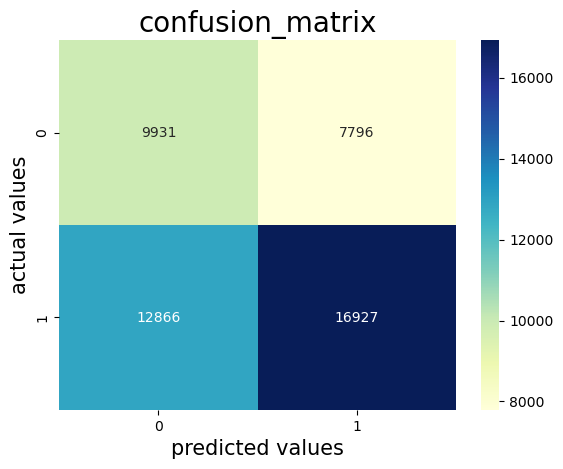

In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# 혼동행렬
confusion_matrix(y_test, y_pred)
print('accuracy : ', accuracy_score(y_pred, y_test))
print('precision : ', precision_score(y_pred, y_test))
print('recall : ', recall_score(y_pred, y_test))
print('f1 : ', f1_score(y_pred, y_test))

print()

sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt=".0f",cmap='YlGnBu')
plt.xlabel('predicted values', size = 15)
plt.ylabel('actual values', size = 15)
plt.title('confusion_matrix', size = 20)

tn, fp, fn, tp = confusion_matrix(y_pred, y_test).ravel()
print('TN FP FN TP : ', tn, fp, fn, tp)

### 의사결정나무 분류

accuracy 0.9947180134680135
precision 0.9951866682845933
recall 0.9946636481241915
f1 0.9949250894680444

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22784
           1       1.00      0.99      0.99     24736

    accuracy                           0.99     47520
   macro avg       0.99      0.99      0.99     47520
weighted avg       0.99      0.99      0.99     47520


TN, FP, FN, TP: 22665 119 132 24604


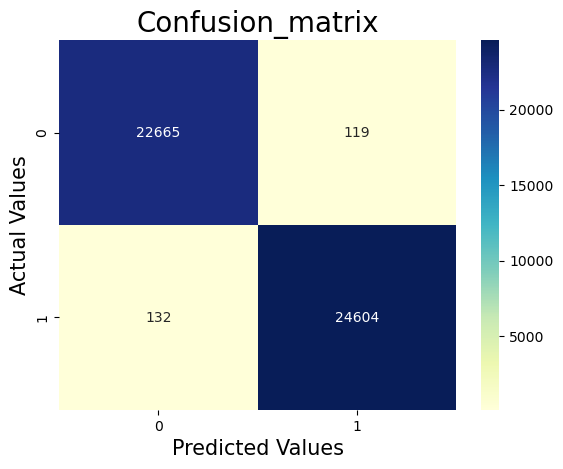

In [36]:
clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

print('accuracy', accuracy_score(prediction, y_test))
print('precision', precision_score(prediction, y_test))
print('recall', recall_score(prediction, y_test))
print('f1', f1_score(prediction, y_test))

print()

print(classification_report(prediction, y_test))

print()

sns.heatmap(confusion_matrix(prediction, y_test), annot = True, fmt = ".0f", cmap = 'YlGnBu')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('Confusion_matrix', size = 20)

tn, fp, fn, tp = confusion_matrix(prediction, y_test).ravel()
print("TN, FP, FN, TP:",tn,fp,fn,tp)  

### 랜덤포레스트 분류

accuracy 0.998442760942761
precision 0.9987461068640537
recall 0.9982615726703052
f1 0.998503780985887

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22785
           1       1.00      1.00      1.00     24735

    accuracy                           1.00     47520
   macro avg       1.00      1.00      1.00     47520
weighted avg       1.00      1.00      1.00     47520


TN, FP, FN, TP: 22754 31 43 24692


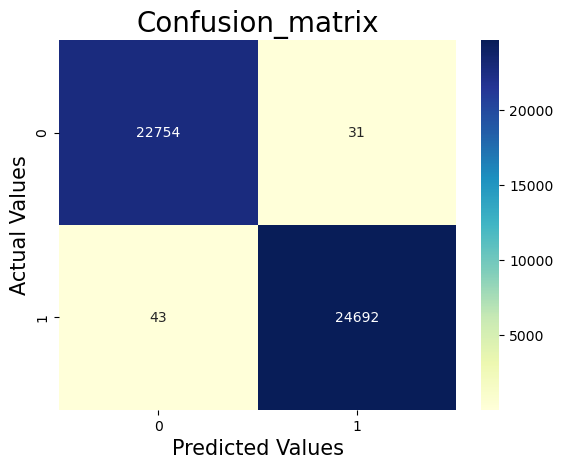

In [37]:
rf = RandomForestClassifier(n_estimators=100,criterion='gini')
rf.fit(X_train, y_train)
y_pred_forest = rf.predict(X_test)

print('accuracy', accuracy_score(y_pred_forest, y_test))
print('precision', precision_score(y_pred_forest, y_test))
print('recall', recall_score(y_pred_forest, y_test))
print('f1', f1_score(y_pred_forest, y_test))

print()

print(classification_report(y_pred_forest, y_test))

print()

sns.heatmap(confusion_matrix(y_pred_forest, y_test), annot = True, fmt = ".0f", cmap = 'YlGnBu')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('Confusion_matrix', size = 20)

tn, fp, fn, tp = confusion_matrix(y_pred_forest, y_test).ravel()
print("TN, FP, FN, TP:",tn,fp,fn,tp)  

### XGBoost 분류

accuracy 0.5202651515151515
precision 1.0
recall 0.5202651515151515
f1 0.6844400149495453

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.52      0.68     47520

    accuracy                           0.52     47520
   macro avg       0.50      0.26      0.34     47520
weighted avg       1.00      0.52      0.68     47520


TN, FP, FN, TP: 0 0 22797 24723


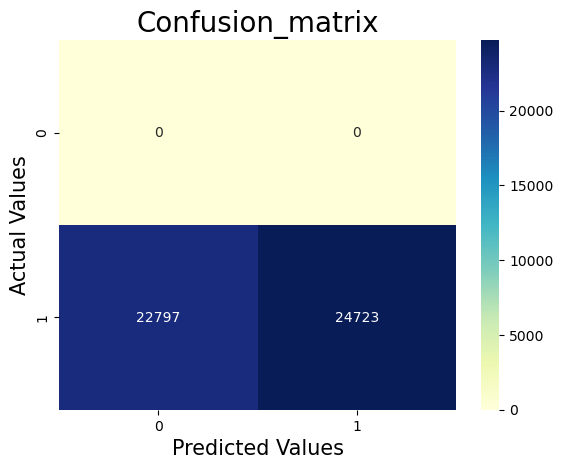

In [38]:
xgb = XGBClassifier(learning_rate = 0.0001,objective = 'reg:squarederror')
xgb.fit(np.array(X_train),np.array(y_train))
xgb_pred = xgb.predict(np.array(X_test))

print('accuracy', accuracy_score(xgb_pred, y_test))
print('precision', precision_score(xgb_pred, y_test))
print('recall', recall_score(xgb_pred, y_test))
print('f1', f1_score(xgb_pred, y_test))

print()

# 자세한 분류 보고서
print(classification_report(xgb_pred, y_test))

print()

sns.heatmap(confusion_matrix(xgb_pred, y_test), annot = True, fmt = ".0f", cmap = 'YlGnBu')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('Confusion_matrix', size = 20)

tn, fp, fn, tp = confusion_matrix(xgb_pred, y_test).ravel()
print("TN, FP, FN, TP:",tn,fp,fn,tp)  

## 종속변수 = STOP(ON/OFF) 모델

데이터 나누기

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_stop, test_size = 0.3, shuffle = True, random_state = 1004)

### 로지스틱 회귀

accuracy :  0.629503367003367
precision :  0.33702849855299943
recall :  0.6268588632424049
f1 :  0.4383692739568712

TN FP FN TP :  23043 13516 4090 6871


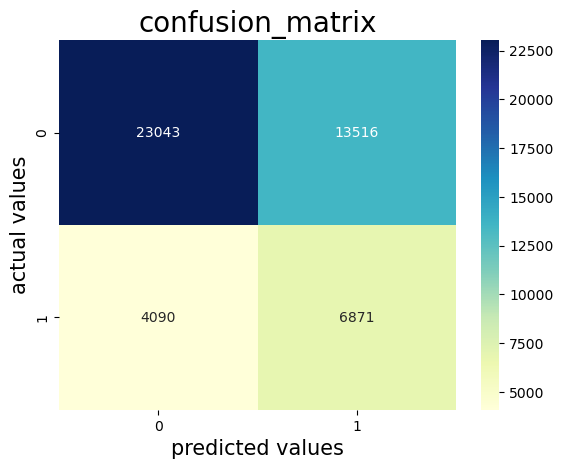

In [40]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# 혼동행렬
confusion_matrix(y_test, y_pred)
print('accuracy : ', accuracy_score(y_pred, y_test))
print('precision : ', precision_score(y_pred, y_test))
print('recall : ', recall_score(y_pred, y_test))
print('f1 : ', f1_score(y_pred, y_test))

print()

sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt=".0f",cmap='YlGnBu')
plt.xlabel('predicted values', size = 15)
plt.ylabel('actual values', size = 15)
plt.title('confusion_matrix', size = 20)

tn, fp, fn, tp = confusion_matrix(y_pred, y_test).ravel()
print('TN FP FN TP : ', tn, fp, fn, tp)

### 의사결정나무 분류

accuracy 0.9897516835016835
precision 0.9876882326973071
recall 0.9884154722167681
f1 0.9880517186388281

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     27148
           1       0.99      0.99      0.99     20372

    accuracy                           0.99     47520
   macro avg       0.99      0.99      0.99     47520
weighted avg       0.99      0.99      0.99     47520


TN, FP, FN, TP: 26897 251 236 20136


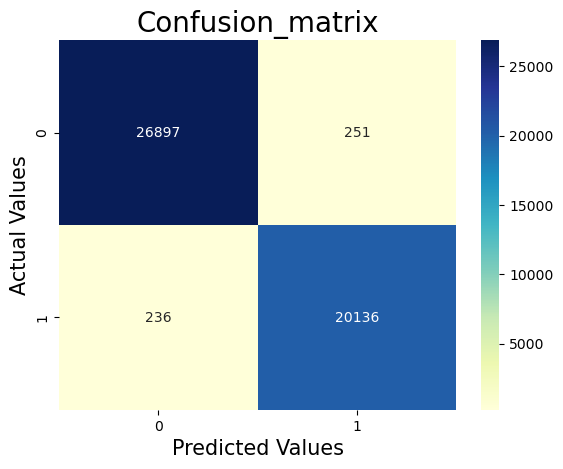

In [41]:
clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

print('accuracy', accuracy_score(prediction, y_test))
print('precision', precision_score(prediction, y_test))
print('recall', recall_score(prediction, y_test))
print('f1', f1_score(prediction, y_test))

print()

print(classification_report(prediction, y_test))

print()

sns.heatmap(confusion_matrix(prediction, y_test), annot = True, fmt = ".0f", cmap = 'YlGnBu')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('Confusion_matrix', size = 20)

tn, fp, fn, tp = confusion_matrix(prediction, y_test).ravel()
print("TN, FP, FN, TP:",tn,fp,fn,tp)  

### 랜덤포레스트 분류

accuracy 0.9947390572390572
precision 0.9948987099622308
recall 0.9928532967839836
f1 0.993874950999608

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     27091
           1       0.99      0.99      0.99     20429

    accuracy                           0.99     47520
   macro avg       0.99      0.99      0.99     47520
weighted avg       0.99      0.99      0.99     47520


TN, FP, FN, TP: 26987 104 146 20283


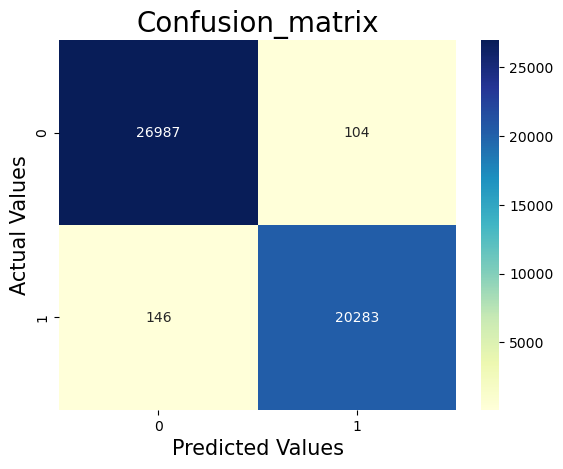

In [42]:
rf = RandomForestClassifier(n_estimators=100,criterion='gini')
rf.fit(X_train, y_train)
y_pred_forest = rf.predict(X_test)

print('accuracy', accuracy_score(y_pred_forest, y_test))
print('precision', precision_score(y_pred_forest, y_test))
print('recall', recall_score(y_pred_forest, y_test))
print('f1', f1_score(y_pred_forest, y_test))

print()

print(classification_report(y_pred_forest, y_test))

print()

sns.heatmap(confusion_matrix(y_pred_forest, y_test), annot = True, fmt = ".0f", cmap = 'YlGnBu')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('Confusion_matrix', size = 20)

tn, fp, fn, tp = confusion_matrix(y_pred_forest, y_test).ravel()
print("TN, FP, FN, TP:",tn,fp,fn,tp)  

### XGBoost 분류

accuracy 0.5709806397306397
precision 0.0
recall 0.0
f1 0.0

              precision    recall  f1-score   support

           0       1.00      0.57      0.73     47520
           1       0.00      0.00      0.00         0

    accuracy                           0.57     47520
   macro avg       0.50      0.29      0.36     47520
weighted avg       1.00      0.57      0.73     47520


TN, FP, FN, TP: 27133 20387 0 0


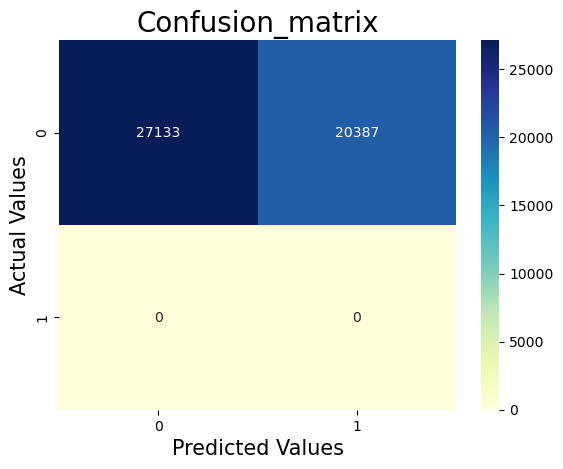

In [43]:
xgb = XGBClassifier(learning_rate = 0.0001,objective = 'reg:squarederror')
xgb.fit(np.array(X_train),np.array(y_train))
xgb_pred = xgb.predict(np.array(X_test))

print('accuracy', accuracy_score(xgb_pred, y_test))
print('precision', precision_score(xgb_pred, y_test))
print('recall', recall_score(xgb_pred, y_test))
print('f1', f1_score(xgb_pred, y_test))

print()

# 자세한 분류 보고서
print(classification_report(xgb_pred, y_test))

print()

sns.heatmap(confusion_matrix(xgb_pred, y_test), annot = True, fmt = ".0f", cmap = 'YlGnBu')
plt.xlabel('Predicted Values', size = 15)
plt.ylabel('Actual Values', size = 15)
plt.title('Confusion_matrix', size = 20)

tn, fp, fn, tp = confusion_matrix(xgb_pred, y_test).ravel()
print("TN, FP, FN, TP:",tn,fp,fn,tp)  